In [28]:
import pandas as pd

a. Caricare in un dataframe le informazioni presenti nel foglio ‘customers’ del file BikeStores
presenta al link

In [29]:
df = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name="customers")
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


b. Visualizzare i nominativi dei clienti di cui non si conosce né il numero di telefono né la mail

In [30]:
df.loc[df["phone"].isnull() | df["email"].isnull(), ["first_name", "last_name"]]

,first_name,last_name
0,Debra,Burks
1,Kasha,Todd
2,Tameka,Fisher
3,Daryl,Spence
5,Lyndsey,Bean
...,...,...
1440,Jamaal,Morrison
1441,Cassie,Cline
1442,Lezlie,Lamb
1443,Ivette,Estes


c. Visualizzare l’indirizzo dei clienti che usano gmail come propria mail personale

In [31]:
df.loc[df["email"].str.endswith("@gmail.com") == True, "email"]

9        pamelia.newman@gmail.com
14        linnie.branch@gmail.com
20         tobie.little@gmail.com
21        adelle.larsen@gmail.com
24      regenia.vaughan@gmail.com
                  ...            
1428     lorrie.justice@gmail.com
1441       cassie.cline@gmail.com
1442        lezlie.lamb@gmail.com
1443       ivette.estes@gmail.com
1444      ester.acevedo@gmail.com
Name: email, Length: 304, dtype: object

d. Eliminare la colonna customer_id dal dataframe

In [32]:
df = df.drop(columns= ["customer_id"])
df

,first_name,last_name,phone,email,street,city,state,zip_code
0,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...
1440,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


e. Calcolare il numero di clienti per ogni stato e visualizzare queste informazioni in un pie chart.
Dare un nome appropriato al titolo del grafico

In [33]:
import matplotlib.pyplot as plt


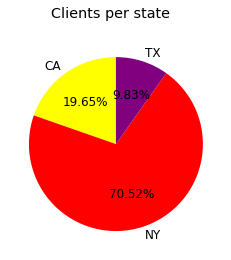

In [34]:
df1 = df.groupby("state", as_index = False)["first_name"].count()

plt.rcParams.update({"font.size" : 12})

fig = plt.figure()
ax = plt.axes()
labelss = list(df1["state"])
#  autopct = "%1.1f%%"  ----->    nelle virgolette il primo 1 è la lontananza dei percentuali
#  startangle = 90   ------>    per ruotare il grafico
#  colors = ["yellow", "red","purple"]    ------->   per colorare il grafico e si alternano
#  si scrive con l'= perche possiamo scrivere le funzioni senza ordine
ax.pie(df1["first_name"],labels = labelss, autopct = "%1.2f%%",startangle = 90, colors = ["yellow", "red","purple"])

fig.suptitle("Clients per state")

plt.show()

f. Calcolare il numero di clienti di ogni città. Visualizzare il nome della città e il numero di clienti
che risiedono in quella città. Ordinare in ordine decrescente sul numero di clienti e visualizzare le
informazioni in un grafico a barre orizzontali. Dare un nome appropriato al titolo del grafico e agli assi

No handles with labels found to put in legend.


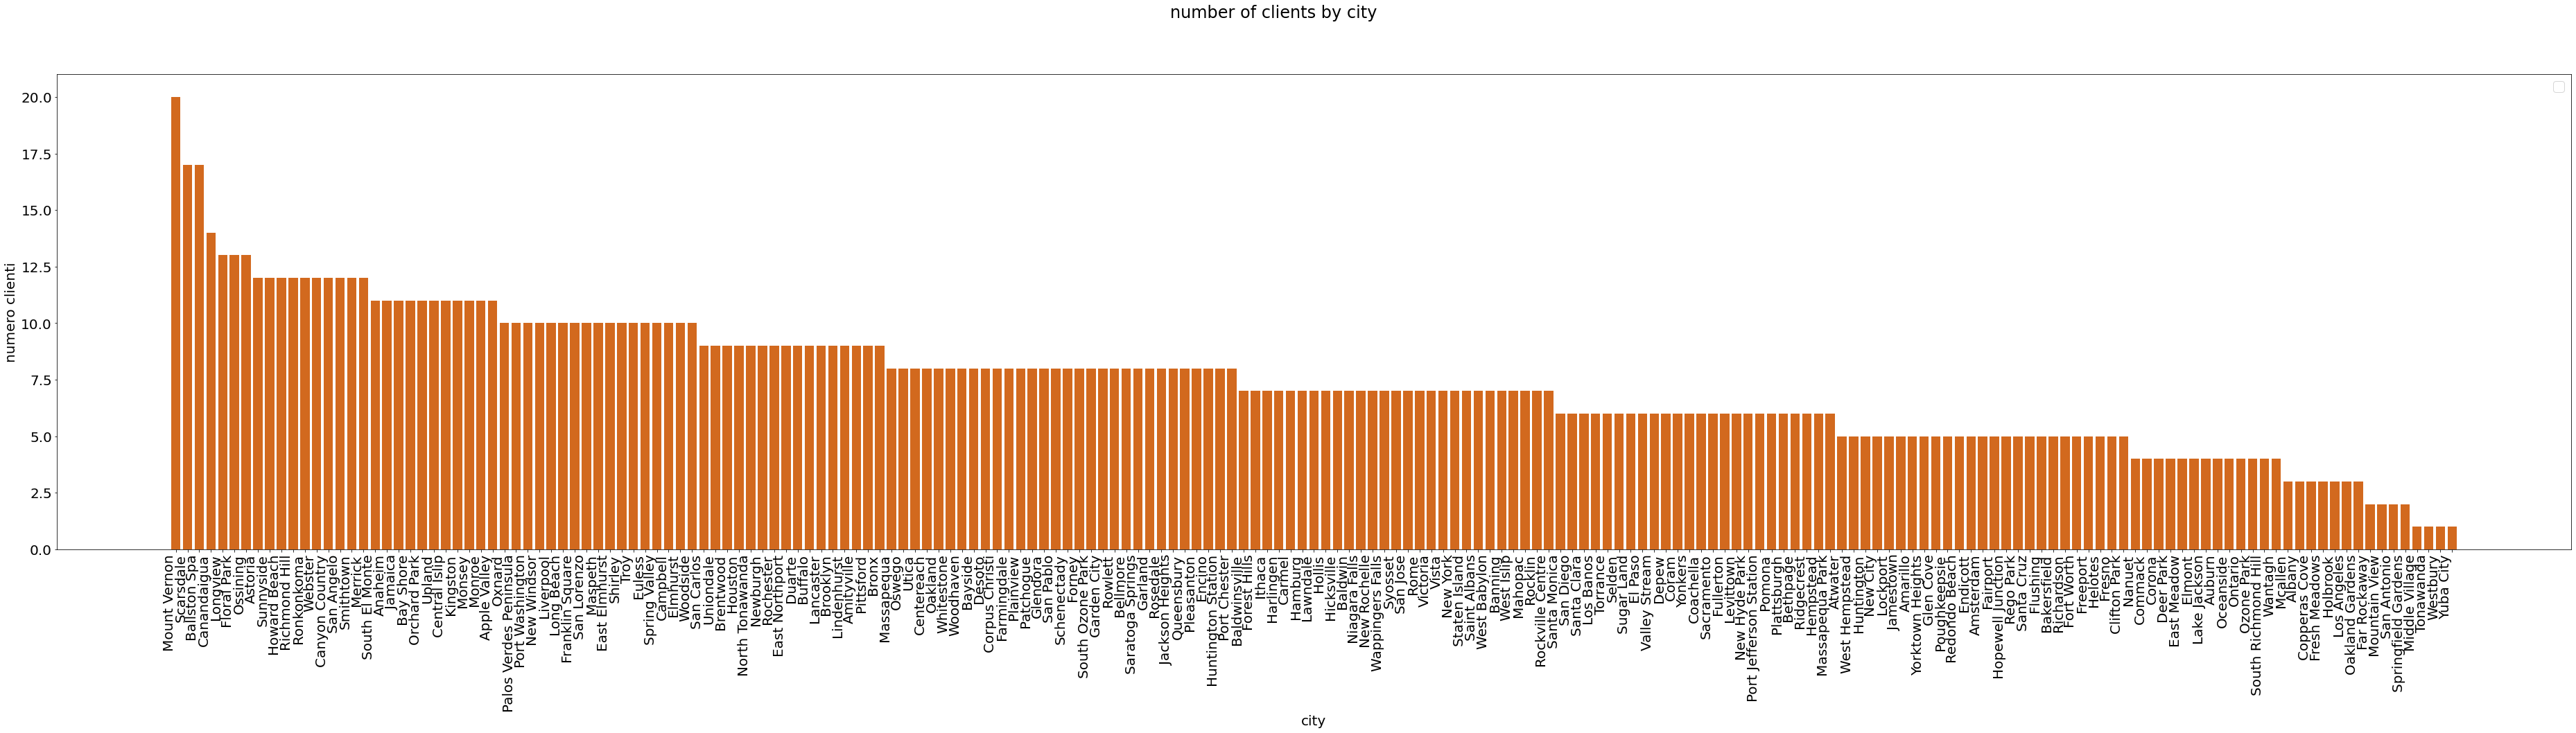

In [35]:
df2 = df.groupby("city")["first_name"].count().sort_values(ascending = False)


#  ingrandisce tutto di 50% visto che il default del size di tutto è 10
plt.rcParams.update({"font.size" : 20})

#  crea la figura
fig = plt.figure(figsize=(65,14))

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(df2.index, df2.values, color="chocolate")

#  crea un titolo nell'asse x
ax.set_xlabel("city")

#  crea un titolo nell'asse y
ax.set_ylabel("numero clienti")

#  ruota i label o i nomi dell'asse x
fig.autofmt_xdate(rotation=90) 

#  crea un titolo
fig.suptitle("number of clients by city")

#   per mettere la legenda delle colonne o barre
ax.legend(loc=0)

plt.show()

g. Visualizzare le città che hanno un numero di clienti compreso tra 10 e 20. Visualizzare il nome
della città e il numero di clienti.

In [36]:
df2.loc[(df2.values > 10) & (df2.values < 20)]

city
Scarsdale         17
Ballston Spa      17
Canandaigua       14
Longview          13
Floral Park       13
Ossining          13
Astoria           12
Sunnyside         12
Howard Beach      12
Richmond Hill     12
Ronkonkoma        12
Webster           12
Canyon Country    12
San Angelo        12
Smithtown         12
Merrick           12
South El Monte    11
Anaheim           11
Jamaica           11
Bay Shore         11
Orchard Park      11
Upland            11
Central Islip     11
Kingston          11
Monsey            11
Monroe            11
Apple Valley      11
Name: first_name, dtype: int64

h. Calcolare il numero di città per ogni stato. Visualizzare il nome dello stato e il numero delle
città

In [37]:
df3 = df.groupby("state", as_index = False)["city"].count()
df3

,state,city
0,CA,284
1,NY,1019
2,TX,142


i. Eliminare dal dataframe tutti i clienti di Buffalo di cui non si conosce il telefono

In [41]:
df.drop(df.index[(df["city"] == "Buffalo") & (df["phone"].isnull())], inplace = True)
df.loc[df["city"] == "Buffalo"]

,first_name,last_name,phone,email,street,city,state,zip_code
6,Latasha,Hays,(716) 986-3359,latasha.hays@hotmail.com,7014 Manor Station Rd.,Buffalo,NY,14215.0
79,Sarai,Mckee,(716) 912-8110,sarai.mckee@msn.com,641 Glenwood Avenue,Buffalo,NY,14215.0
261,Rubin,Decker,(716) 950-9835,rubin.decker@gmail.com,9875 Shady Ave.,Buffalo,NY,14215.0
628,Evelina,Byrd,(716) 601-7704,evelina.byrd@msn.com,628 S. Church St.,Buffalo,NY,14215.0
770,Agnes,Sims,(716) 780-9901,agnes.sims@aol.com,170 Queen Lane,Buffalo,NY,14215.0
863,Lore,Sykes,(716) 382-5169,lore.sykes@aol.com,7050 Beach Drive,Buffalo,NY,14215.0
1156,Anton,Barton,(716) 472-3707,anton.barton@msn.com,7284 East Indian Spring Rd.,Buffalo,NY,14215.0
1194,Chantell,Bridges,(716) 941-6072,chantell.bridges@yahoo.com,8478 N. Wrangler Dr.,Buffalo,NY,14215.0
1408,Lamar,Bush,(716) 294-7174,lamar.bush@msn.com,76 Lilac Drive,Buffalo,NY,14215.0
